159 198
0.803030303030303
1.0
0.8408163265306122


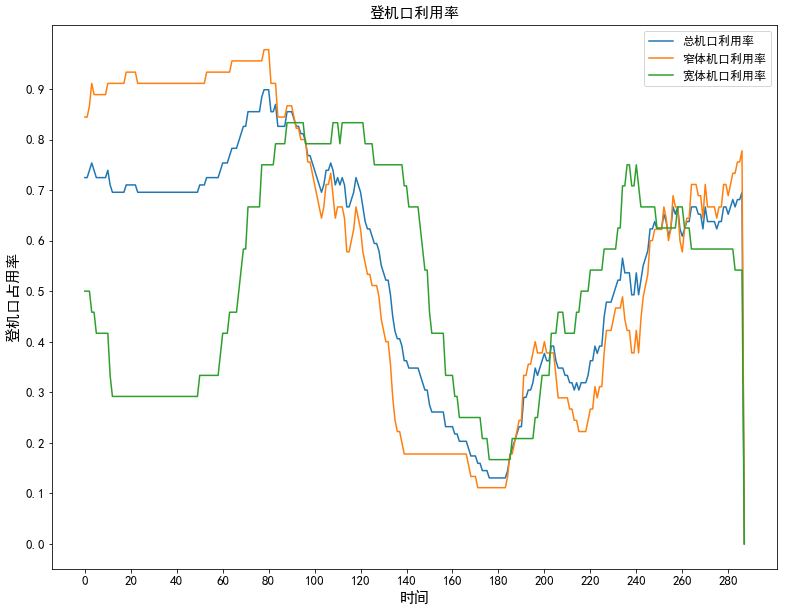

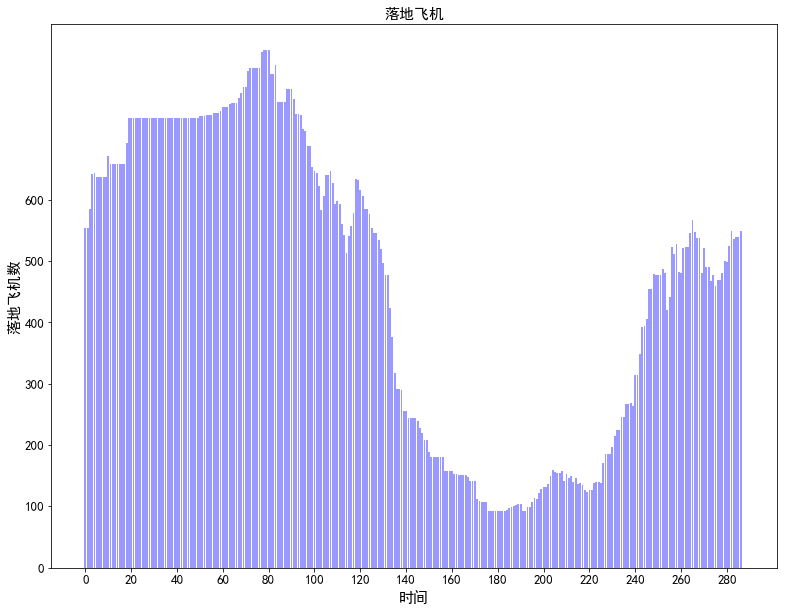

In [3]:
#coding:utf-8
import csv
import numpy as np
import pandas as pd
import xlrd
import datetime
import matplotlib.pyplot as plt
#读取InputData这个文件,自己的文件放在哪里就用什么路径
Csv_path = 'D:\\BaiduNetdiskDownload\\ICM\\航站楼登机口分配问题'
Pucks = pd.read_excel(Csv_path+'\\InputData(3).xlsx', sheet_name = 'Pucks', encoding='utf-8')
Gates = pd.read_excel(Csv_path+'\\InputData(3).xlsx', sheet_name = 'Gates', encoding='utf-8')
#Pucks航班信息，类型pandas对象
Pucks
#Gates登机口信息，类型pandas对象
Gates
#转换为numpy数组
pucks = np.array(Pucks)
gates = np.array(Gates)
#把输入数据里的D、I和飞机型号转换为数值
#I = 1;D = 2;窄体机 = 1;宽体机 = 2
Wb = [ 332, 333, '33E', '33H', '33L', 773]
Nb = [319, 320, 321, 323, 325, 738, '73A', '73E', '73H', '73L']
for i in pucks:
    if i[4] in Wb:
        i[4] = 2
    if i[4] in Nb:
        i[4] = 1
    if i[3] == 'I':
        i[3] = 1
    else:
        i[3] = 2
    if i[8] == 'I':
        i[8] = 1
    else:
        i[8] = 2
#TF是每个时间在地面上的飞机数
TF = np.zeros(288)
TF
#TS是每个时间登机口停放的飞机类型，窄体机=1;宽体机=2
TS = np.zeros((69, 288))
TS
#每个班次停放在哪个登机口，T厅的机口为T后的数值，S厅的机口为S后数值+28
Airp = np.zeros(245)
Airp
#外层循环班次，内层循环找适合的登机口
for idi,i in enumerate(pucks):
    for idj,j in enumerate(gates):
        #print(i)
        #print(j)
        #判断起飞落地机型是否匹配
        if (i[3] == j[3] or j[3] == 3) and (i[8] == j[4] or j[4] == 3) and i[4] == j[5]:
            ti1 = int((i[1].hour*60+i[1].minute)/5)
            ti2 = int((i[6].hour*60+i[6].minute)/5)
            #21号起飞的飞机到287时刻就不再计算
            if i[5].day == 21:
                ti2 = 287
            #19号降落的飞机按顺序安排在20号0：00时间点
            if i[0].day == 19:
                ti1 = 0
            for k in range(ti1, min(ti2+1, 287)):
                TF[k] += 1
            #print (ti1, ti2)
            #print(i[0].day)
            #若找到合适登机口，把未来需要使用的时间标记为飞机类型正数，起飞后的45分钟标记为负数
            if i[0].day == 19:
                #print('heool')
                if TS[idj][0] == 0:
                    Airp[idi] = j[0]
                    for k in range(0, int(min(ti2+1, 287))):
                        if i[4] == 1:
                            TS[idj][k] = 1
                        else:
                            TS[idj][k] = 2
                    for k in range(int(min(ti2+1, 287)), int(min(ti2+10, 287))):
                        if i[4] == 1:
                            TS[idj][k] = -1
                        else:
                            TS[idj][k] = -2
                    break
            else:
                if TS[idj][ti1] == 0:
                    Airp[idi] = j[0]
                    for k in range(ti1, min(ti2+1, 287)):
                        if i[4] == 1:
                            TS[idj][k] = 1
                        else:
                            TS[idj][k] = 2
                    for k in range(min(ti2+1, 287), min(ti2+10, 287)):
                        if i[4] == 1:
                            TS[idj][k] = -1
                        else:
                            TS[idj][k] = -2
                    break
    if Airp[idi] == 0:
        Airp[idi] = -1

#计算宽体机和窄体机的成功分配律
N = 0
W = 0
uN = 0
uW = 0;
for id,i in enumerate(pucks):
    if i[4] == 1:
        N += 1
        if Airp[id] > -1:
            uN += 1
    else:
        W += 1
        if Airp[id] > -1:
            uW += 1
print(uN, N)
print(uN/N)
print(uW/W)
print((uN+uW)/(N+W))
#计算每个时刻宽体机口和窄体机口的使用率
use = np.zeros(288)
useN = np.zeros(288)
useW = np.zeros(288)
N = 0
W = 0
for i in gates:
    if i[5] == 1:
        N += 1
    else:
        W += 1
for j in range(0,288):
    cnt = 0
    cntN = 0
    cntW = 0
    for i in range(0, 69):
        if TS[i][j] > 0:
            cnt += 1
            if gates[i][5] == 1:
                cntN += 1
            if gates[i][5] == 2:
                cntW += 1
    use[j] = cnt/69
    useN[j] = cntN/N
    useW[j] = cntW/W
#使用率图
#from matplotlib.font_manager import FontProperties
#font1 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=20) #可指定计算机内的任意字体，size为字体大小
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
fig = plt.figure(figsize=(13,10))
# plt.xlim((0,300))
# plt.ylim((0.0,1.0))
plt.tick_params(labelsize=13)   #坐标轴字体大小
plt.xticks(np.arange(0, 300, 20))   #横坐标刻度
plt.yticks(np.arange(0, 1, 0.1))   #纵坐标刻度
plt.xlabel('时间', size = 15)   #横坐标标签
plt.ylabel('登机口占用率', size = 15)   #纵坐标标签
plt.title('登机口利用率', size = 15)   #标题
plt.plot(range(0, 288), use, label = '总机口利用率')
plt.plot(range(0, 288), useN, label = '窄体机口利用率')
plt.plot(range(0, 288), useW, label = '宽体机口利用率')
plt.legend(loc = 'upper right', fontsize = 12)   #图例位置和字体大小
plt.show()
#落地飞机图
plt.figure(figsize=(13,10))
plt.tick_params(labelsize=13)
plt.xticks(np.arange(0, 300, 20))
plt.yticks(np.arange(0, 700, 100))
plt.xlabel('时间', size = 15)
plt.ylabel('落地飞机数', size = 15)
plt.title('落地飞机', size = 15)
plt.bar(range(0, 288),TF,facecolor='#9999ff')
plt.show()